In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats as st
import numpy as np
import heapq
from matplotlib.patches import Rectangle

In [25]:
data1 = pd.read_csv('../data/ReverseChanel1_800nm_0_03.csv', sep=';', encoding='cp1251')

In [26]:
data1 = data1['mV']

In [27]:
eps = 1e-4

[301, 307, 343]
387
[0.03418  0.034183]
[[0.036468 0.03647 ]
 [0.036538 0.036552]
 [0.037365 0.037374]]


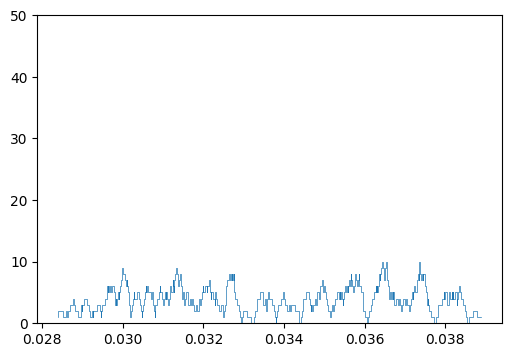

In [28]:
#def moda():
data1_with_error = []
for i in range (data1.size):
    data1_with_error.append(data1[i] - eps)
    data1_with_error.append(data1[i] + eps)

ints_list1 = list(set(data1_with_error))
ints_list1.sort()
ints_list1 = np.array([[ints_list1[i], ints_list1[i+1]] for i in range(len(ints_list1) - 1)])

data1_with_error = np.array(data1_with_error).reshape(len(data1_with_error)//2, 2)

mode_list = []
for i in range (len(ints_list1)):
    count = 0
    for j in range (data1_with_error.shape[0]):
#        if(set(data1_with_error[j]).issubset(set(ints_list1[i]))): 
        if(data1_with_error[j][0] <= ints_list1[i][0] and data1_with_error[j][1] >= ints_list1[i][1]): 
            count += 1
    mode_list.append(count)
    
max_mode=heapq.nlargest(3, range(len(mode_list)), mode_list.__getitem__)
print(max_mode)
print(len(mode_list))

mode_list = np.array(mode_list)
begin, end = 0, len(mode_list) - 1
while begin != end and end != begin + 1 :
    if (np.sum(mode_list[0:(begin+end) // 2 - 1]) < np.sum(mode_list[(begin+end) // 2 + 1: len(mode_list)])):
        begin = (begin+end) // 2
    else:
        end = (begin+end) // 2

median = ints_list1[(begin+end) // 2 + 1]
print(median)


ints_list1_med = [(ints[0] + ints[1]) / 2 for ints in ints_list1]
plt.figure(figsize=(6, 4))
plt.ylim([0, 50])
plt.step(ints_list1_med, mode_list,lw=0.5)

print(ints_list1[max_mode])

In [29]:
#def countJaccar():
x_a_max = np.amax(data1_with_error[:, 0])
x_a_min = np.amin(data1_with_error[:, 0])
x_b_max = np.amax(data1_with_error[:, 1])
x_b_min = np.amin(data1_with_error[:, 1])
print(x_a_max)
print(x_a_min)
print(x_b_max)
print(x_b_min)
print((x_b_min - x_a_max)/(x_b_max - x_a_min))
#    return JK

0.038771999999999994
0.028358
0.038972
0.028558
-0.9623139250047104


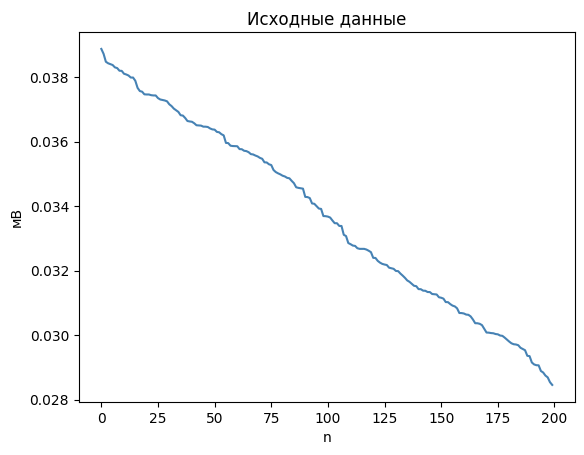

In [30]:
data1.plot(color = "steelblue")
plt.title('Исходные данные')
plt.xlabel('n')
plt.ylabel('мВ')
plt.savefig('../result/expdata_1.png', dpi = 1000)

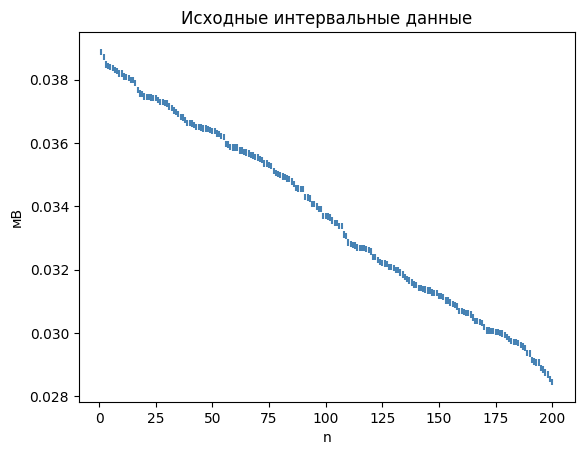

In [31]:
plt.vlines(data1.index + 1, data1 - eps, data1 + eps, color = "steelblue")
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Исходные интервальные данные')
plt.savefig('../result/data1_interval.png', dpi = 1000)

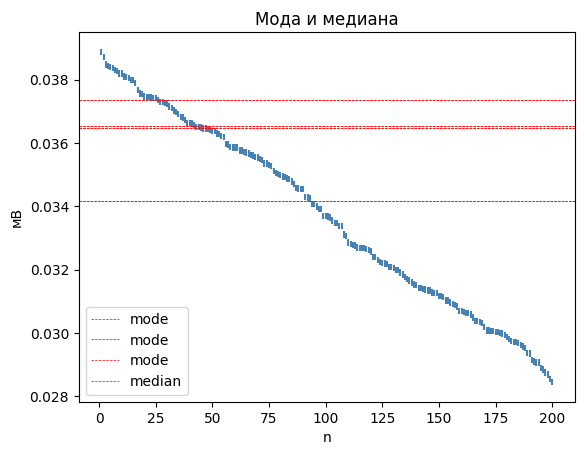

In [32]:
plt.vlines(data1.index + 1, data1 - eps, data1 + eps, color = "steelblue")
for i in max_mode:
    plt.axhline(y=ints_list1[i][0], color='r', linestyle='--', linewidth = 0.5, label='mode')
    plt.axhline(y=ints_list1[i][1], color='r', linestyle='--', linewidth = 0.5)

plt.axhline(y=median[0], color='g', linestyle='--', linewidth = 0.5, label='median')
plt.axhline(y=median[1], color='g', linestyle='--', linewidth = 0.5)
plt.title('Мода и медиана')
plt.xlabel('n')
plt.ylabel('мВ')
plt.legend()
plt.savefig('../result/mod_med.png', dpi = 1000)

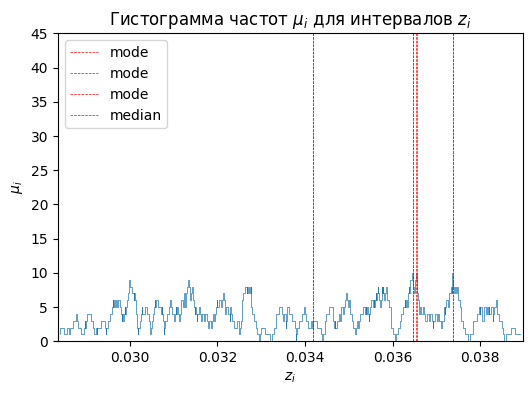

In [33]:
plt.figure(figsize=(6, 4))
plt.xlim([ints_list1[0][0], ints_list1[len(ints_list1) - 1][1]])
plt.ylim([0, 45])
plt.step(ints_list1_med, mode_list,lw=0.5)
for i in max_mode:
    plt.axvline(ints_list1[i][0], color='r', linestyle='--', linewidth = 0.5, label='mode')
    plt.axvline(ints_list1[i][1], color='r', linestyle='--', linewidth = 0.5)

plt.axvline(median[0], color='g', linestyle='--', linewidth = 0.5, label='median')
plt.axvline(median[1], color='g', linestyle='--', linewidth = 0.5)
plt.legend()
plt.title('Гистограмма частот $\mu_{i}$ для интервалов $z_{i}$')
plt.xlabel('$z_{i}$')
plt.ylabel('$\mu_{i}$')
plt.legend()
plt.savefig('../result/mod_med_1.png', dpi = 1000)